<a href="https://colab.research.google.com/github/joaotinti75/Machine-Learning/blob/main/Aula_RNA_FeatureExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Extração de características

In [1]:
import cv2
import numpy as np
import os
import zipfile
from google.colab.patches import cv2_imshow
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/Visão Computacional Guia Completo-20230201T234050Z-001/Visão Computacional Guia Completo/Datasets/homer_bart_1.zip'
zip_object = zipfile.ZipFile(file = path, mode='r')

zip_object.extractall('./')
zip_object.close()
     

In [5]:
diretorio = '/content/homer_bart_1'
arquivos = [os.path.join(diretorio, f) for f in sorted(os.listdir(diretorio))] 
print(arquivos)

['/content/homer_bart_1/.DS_Store', '/content/homer_bart_1/bart1.bmp', '/content/homer_bart_1/bart10.bmp', '/content/homer_bart_1/bart100.bmp', '/content/homer_bart_1/bart101.bmp', '/content/homer_bart_1/bart102.bmp', '/content/homer_bart_1/bart103.bmp', '/content/homer_bart_1/bart104.bmp', '/content/homer_bart_1/bart105.bmp', '/content/homer_bart_1/bart106.bmp', '/content/homer_bart_1/bart108.bmp', '/content/homer_bart_1/bart109.bmp', '/content/homer_bart_1/bart11.bmp', '/content/homer_bart_1/bart110.bmp', '/content/homer_bart_1/bart111.bmp', '/content/homer_bart_1/bart112.bmp', '/content/homer_bart_1/bart113.bmp', '/content/homer_bart_1/bart114.bmp', '/content/homer_bart_1/bart115.bmp', '/content/homer_bart_1/bart116.bmp', '/content/homer_bart_1/bart117.bmp', '/content/homer_bart_1/bart118.bmp', '/content/homer_bart_1/bart119.bmp', '/content/homer_bart_1/bart12.bmp', '/content/homer_bart_1/bart120.bmp', '/content/homer_bart_1/bart121.bmp', '/content/homer_bart_1/bart122.bmp', '/conte

In [21]:
export = 'boca,calca,sapato,camisa,calcao,tenis,classe\n' #vamos exportar um arquivo contendo as características da imagem

In [22]:
mostrar_imagens = False
caracteristicas = []

In [23]:
for imagem_caminho in arquivos:
  try:
    imagem_original = cv2.imread(imagem_caminho)
    (H, W) = imagem_original.shape[:2]
  except:
    continue
  
  imagem_alterada = imagem_original.copy()
  imagem_caracteristicas = []
  imagem_nome = os.path.basename(os.path.normpath(imagem_caminho))
  boca = calca = sapato = 0
  camisa = calcao = tenis = 0

  if imagem_nome.startswith('b'):
    classe = 0
  else:
    classe = 1

  for altura in range(0, H):
    for largura in range(0, W):
      azul = imagem_alterada.item(altura, largura, 0)
      verde = imagem_alterada.item(altura, largura, 1)
      vermelho = imagem_alterada.item(altura, largura, 2)

      # Homer - marrom da boca
      if (azul >= 95 and azul <= 140 and verde >= 160 and verde <= 185 and vermelho >= 175 and vermelho <= 205):
        imagem_alterada[altura, largura] = [0, 0, 255]
        boca += 1

      # Homer - azul da calça
      if (azul >= 150 and azul <= 180 and verde >= 98 and verde <= 120 and vermelho >= 0 and vermelho <= 90):
        imagem_alterada[altura, largura] = [0, 0, 255]
        calca += 1

      # Homer - cinza do sapato
      if altura > (H / 2): # o sapato do homer geralmente está na parte inferior da imagem
        if (azul >= 25 and azul <= 45 and verde >= 25 and verde <= 45 and vermelho >= 25 and vermelho <= 45):
            imagem_alterada[altura, largura] = [0, 0, 255]
            sapato += 1

      # Bart - laranja da camisa
      if (azul >= 11 and azul <= 50 and verde >= 85 and verde <= 105 and vermelho >= 240 and vermelho <= 255):
        imagem_alterada[altura, largura] = [0, 255, 128]
        camisa += 1

      # Bart - azul do calção
      if (azul >= 125 and azul <= 170 and verde >= 0 and verde <= 12 and vermelho >= 0 and vermelho <= 20):
        imagem_alterada[altura, largura] = [0, 255, 128]
        calcao += 1

      # Bart - azul do tenis
      if altura > (H / 2):
        if (azul >= 125 and azul <= 170 and verde >= 0 and verde <= 12 and vermelho >= 0 and vermelho <= 20):
          imagem_alterada[altura, largura] = [0, 255, 128]
          calcao += 1

  boca = round((boca / (H * W)) * 100, 9) #extraindo o proporcional de pixels que existe em cada uma das imagens
  calca = round((calca / (H * W)) * 100, 9)
  sapato = round((sapato / (H * W)) * 100, 9)
  camisa = round((camisa / (H * W)) * 100, 9)
  calcao = round((calcao / (H * W)) * 100, 9)
  tenis = round((tenis / (H * W)) * 100, 9)

  imagem_caracteristicas.append(boca)
  imagem_caracteristicas.append(calca)
  imagem_caracteristicas.append(sapato)
  imagem_caracteristicas.append(camisa)
  imagem_caracteristicas.append(calcao)
  imagem_caracteristicas.append(tenis)
  imagem_caracteristicas.append(classe)

  caracteristicas.append(imagem_caracteristicas)  

  f = (','.join([str(item) for item in imagem_caracteristicas]))
  export += f + '\n'

  if mostrar_imagens == True:
    imagem_alterada = cv2.cvtColor(imagem_alterada, cv2.COLOR_BGR2RGB)
    imagem_original = cv2.cvtColor(imagem_original, cv2.COLOR_BGR2RGB)

    figura, im = plt.subplots(1, 2) #1 linha e 2 colunas
    im[0].imshow(imagem_original)
    im[0].axis('off')
    im[1].imshow(imagem_alterada)
    img[1].axis('off')
    plt.show()

  #print('Home boca: ', imagem_caracteristicas[0])

In [24]:
export

'boca,calca,sapato,camisa,calcao,tenis,classe\n0.0,0.0,0.114799225,6.886101887,6.99040871,0.0,0\n0.0,0.0,0.11007847,5.004901113,6.367777411,0.0,0\n0.0,0.0,0.182518631,5.264620437,10.059365921,0.0,0\n0.0,0.480168257,0.080028043,0.0,0.0,0.0,0\n0.0,0.0,0.029707562,8.978929368,6.918238994,0.0,0\n0.0,0.0,0.053304904,6.75432362,1.897654584,0.0,0\n0.249585206,0.0,0.019853369,9.693407263,8.209367954,0.0,0\n0.0,0.0,0.181208054,0.0,0.0,0.0,0\n0.0,0.0,0.148868778,0.0,0.0,0.0,0\n0.0,0.0,0.114762211,9.594752524,15.045431095,0.0,0\n0.0,0.0,0.138655462,0.0,0.0,0.0,0\n0.0,0.0,0.02400947,19.545383481,0.0,0.0,0\n0.00307645,0.0,0.0,6.495154592,11.198277188,0.0,0\n0.001317263,0.0,0.087817515,0.0,0.0,0.0,0\n0.0,0.0,0.032184591,8.395721925,0.0,0.0,0\n0.02105732,0.0,0.008503918,8.915750471,0.0,0.0,0\n0.0,0.0,0.081055114,11.095816228,9.050222727,0.0,0\n0.0,0.0,0.08757526,10.493254773,6.366592614,0.0,0\n0.0,0.0,0.043806812,9.563574636,0.0,0.0,0\n0.0,0.0,0.141247989,4.782764169,7.200965493,0.0,0\n0.0,0.01046329

In [25]:
with open('features.csv', 'w') as file:
  for linha in export:
    file.write(linha)
file.closed

True

In [26]:
dataset = pd.read_csv('features.csv')
dataset

,boca,calca,sapato,camisa,calcao,tenis,classe
0,0.000000,0.000000,0.114799,6.886102,6.990409,0.0,0
1,0.000000,0.000000,0.110078,5.004901,6.367777,0.0,0
2,0.000000,0.000000,0.182519,5.264620,10.059366,0.0,0
3,0.000000,0.480168,0.080028,0.000000,0.000000,0.0,0
4,0.000000,0.000000,0.029708,8.978929,6.918239,0.0,0
...,...,...,...,...,...,...,...
264,6.485412,0.000000,0.171985,0.000000,0.000000,0.0,1
265,0.000000,0.000000,0.161637,0.000000,0.000000,0.0,1
266,4.264975,0.000000,0.329940,0.000000,0.000000,0.0,1
267,1.429133,0.000000,0.034559,0.000000,0.000000,0.0,1


## Base de dados de treinamento e teste

In [28]:
X = dataset.iloc[:, 0:6].values
X

array([[ 0.        ,  0.        ,  0.11479923,  6.88610189,  6.99040871,
         0.        ],
       [ 0.        ,  0.        ,  0.11007847,  5.00490111,  6.36777741,
         0.        ],
       [ 0.        ,  0.        ,  0.18251863,  5.26462044, 10.05936592,
         0.        ],
       ...,
       [ 4.26497522,  0.        ,  0.32993967,  0.        ,  0.        ,
         0.        ],
       [ 1.42913348,  0.        ,  0.03455866,  0.        ,  0.        ,
         0.        ],
       [ 0.853902  , 13.74424774,  0.16177802,  0.        ,  0.        ,
         0.        ]])

In [29]:
y = dataset.iloc[:, 6].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [30]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2, random_state=1)

In [32]:
X_treinamento.shape, y_treinamento.shape

((215, 6), (215,))

In [33]:
X_teste.shape, y_teste.shape

((54, 6), (54,))

## Construção e treinamento da rede neural

In [34]:
(6 + 2) / 2

4.0

In [35]:
network2 = tf.keras.Sequential()
# 6 -> 4 -> 4 -> 4 -> 1
#neuronios na 1° camada oculta = 4
network2.add(tf.keras.layers.Dense(input_shape=(6,), units = 4, activation='relu'))
network2.add(tf.keras.layers.Dense(units=4, activation='relu')) #2° camada oculta
network2.add(tf.keras.layers.Dense(units=4, activation='relu')) #3° camada oculta
network2.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # camada de saída


In [36]:
network2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 28        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [37]:
network2.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
historico = network2.fit(X_treinamento, y_treinamento, epochs=50)

Epoch 1/50
7/7 [==============================] - 1s 3ms/step - loss: 0.7227 - accuracy: 0.6884
Epoch 2/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.7349
Epoch 3/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6619 - accuracy: 0.7535
Epoch 4/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6302 - accuracy: 0.7535
Epoch 5/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6022 - accuracy: 0.7535
Epoch 6/50
7/7 [==============================] - 0s 2ms/step - loss: 0.5723 - accuracy: 0.7488
Epoch 7/50
7/7 [==============================] - 0s 2ms/step - loss: 0.5423 - accuracy: 0.7535
Epoch 8/50
7/7 [==============================] - 0s 2ms/step - loss: 0.5087 - accuracy: 0.7488
Epoch 9/50
7/7 [==============================] - 0s 3ms/step - loss: 0.4808 - accuracy: 0.7535
Epoch 10/50
7/7 [==============================] - 0s 2ms/step - loss: 0.4562 - accuracy: 0.7535
Epoch 11/50
7/7 [======================

## Avaliação da rede neural

In [39]:
historico.history.keys()

dict_keys(['loss', 'accuracy'])

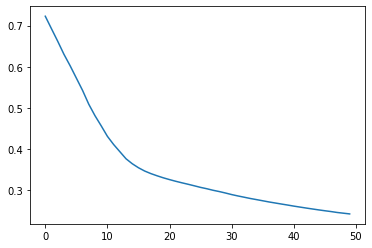

In [40]:
plt.plot(historico.history['loss']);

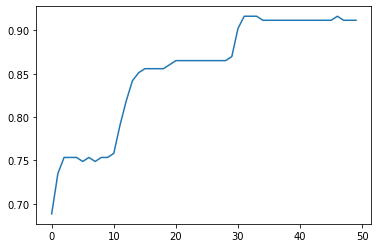

In [41]:
plt.plot(historico.history['accuracy']);

In [42]:
X_teste.shape

(54, 6)

In [43]:
previsoes = network2.predict(X_teste)
previsoes

2/2 [==============================] - 0s 5ms/step


array([[9.1792009e-07],
       [8.6384410e-01],
       [2.3409696e-02],
       [4.6713427e-01],
       [9.6138641e-03],
       [8.9144647e-01],
       [4.6735322e-09],
       [5.7633468e-03],
       [6.3866348e-04],
       [1.0607657e-03],
       [9.6982226e-02],
       [9.8844922e-01],
       [6.7487097e-01],
       [6.0734578e-07],
       [4.6915290e-01],
       [9.8545653e-01],
       [5.9073472e-01],
       [9.1637051e-01],
       [1.0966190e-02],
       [3.8591661e-02],
       [4.2326445e-08],
       [9.5240182e-01],
       [7.6549804e-01],
       [3.6659880e-05],
       [4.6024034e-08],
       [9.7272474e-01],
       [4.7179100e-01],
       [1.2828887e-02],
       [8.6148179e-01],
       [9.9105591e-01],
       [7.5544006e-01],
       [9.9928349e-01],
       [9.8183221e-01],
       [4.9029818e-01],
       [9.9765623e-01],
       [7.5852370e-01],
       [8.3108508e-04],
       [1.6305915e-03],
       [4.6825060e-01],
       [2.6527435e-02],
       [7.6383770e-01],
       [4.747784

In [44]:
previsoes = previsoes > 0.5
previsoes

array([[False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True]])

In [45]:
y_teste

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_teste, previsoes)

0.9259259259259259

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_teste, previsoes)
cm

array([[27,  1],
       [ 3, 23]])

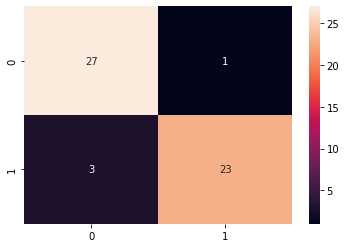

In [48]:
sns.heatmap(cm, annot=True) #annot = True para mostrar os números

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        28
           1       0.96      0.88      0.92        26

    accuracy                           0.93        54
   macro avg       0.93      0.92      0.93        54
weighted avg       0.93      0.93      0.93        54



## Salvar, carregar e classificar uma única imagem

In [51]:
model_json = network2.to_json()
with open('network2.json', 'w') as json_file:
  json_file.write(model_json)

In [52]:
from keras.models import save_model
network2_saved = save_model(network2, '/content/weights2.hdf5')


In [53]:
with open('network2.json', 'r') as json_file:
  json_saved_model = json_file.read()

json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 6], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 6], "dtype": "float32", "units": 4, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 4, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_reg

In [54]:
network2_loaded = tf.keras.models.model_from_json(json_saved_model)
network2_loaded.load_weights('weights2.hdf5')
network2_loaded.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [55]:
network2_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 28        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [56]:
imagem_teste = X_teste[0]
imagem_teste

array([3.07645000e-03, 0.00000000e+00, 0.00000000e+00, 6.49515459e+00,
       1.11982772e+01, 0.00000000e+00])

In [57]:
imagem_teste.shape

(6,)

In [59]:
imagem_teste = imagem_teste.reshape(1, -1)
imagem_teste.shape

(1, 6)

In [60]:
if network2_loaded.predict(imagem_teste)[0][0] < 0.5:
  print('Bart')
else:
  print('Homer')

1/1 [==============================] - 0s 55ms/step
Bart
